# tf2_基础篇
     上一节我们用numpy库搭建了一个较为完整的nn模型，可以发现需要自己建立所有的计算过程（【前向传播，计算成本函数，后向传播，参数更新】），我们不仅需要对各个计算量的维度仔细地处理，还有最令人头疼的后向传播我们需要考虑到了前向计算过程的中间变量的传递，这是一个非常麻烦的过程，但是在Tensorflow中，我们只需要给出前向传播方式，后向传播求梯度就能够自动计算完成，这确实让代码得到了大量的简化，在实践中，很多时候我们需要更改或者添加某种采纳数化方案只需要添加几行代码即可。xim

   # 1、张量（Tensor）：多维数组（列表）阶：张量的维数
    维数         阶          名字                      例子
    0-D           0           标量scalar             s=1 2 3
    1-D           1           向量vector             v=[1, 2, 3]
    2-D           2           矩阵matrix             m=[[1, 2, 3], [4, 5, 6], [7, 8, 9]]
    n-D           n            张量tensor            t=[ [ [ n个

# 2、数据类型
#### ——tf.int, tf.float……
#### tf.int 32, tf.float32, tf.float64

#### ——tf.bool
#### tf.constant([True, False])

#### ——tf.string
#### tf.constant(“Hello, world!”)

# 3、如何创建一个Tensor
### （1）创建一个张量
#### tf.constant(张量内容，dtype=数据类型(可选))

In [1]:
import tensorflow as tf
a=tf.constant([1,5],dtype=tf.int64)
print(a)
print(a.dtype)
print(a.shape)

tf.Tensor([1 5], shape=(2,), dtype=int64)
<dtype: 'int64'>
(2,)


### （2）将numpy的数据类型转换为Tensor数据类型
#### tf. convert_to_tensor(数据名，dtype=数据类型(可选))

In [2]:
import tensorflow as tf
import numpy as np
a = np.arange(0, 5)
b = tf.convert_to_tensor( a, dtype=tf.int64 )
print(a)
print(b)

[0 1 2 3 4]
tf.Tensor([0 1 2 3 4], shape=(5,), dtype=int64)


### （3）生成特定张量
#### ——创建全为0的张量
#### tf. zeros(维度)

#### ——创建全为1的张量
#### tf. ones(维度)

#### ——创建全为指定值的张量
#### tf. fill(维度，指定值)

In [3]:
a = tf.zeros([2, 3])
b = tf.ones(4)
c = tf.fill([2, 2], 9)
print(a)
print(b)
print(c)

tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)
tf.Tensor([1. 1. 1. 1.], shape=(4,), dtype=float32)
tf.Tensor(
[[9 9]
 [9 9]], shape=(2, 2), dtype=int32)


### （4）生成随机数
#### ——生成正态分布的随机数，默认均值为0，标准差为1
#### tf. random.normal(维度，mean=均值，stddev=标准差)

#### ——生成截断式正态分布的随机数
#### tf. random.truncated_normal (维度，mean=均值，stddev=标准差)

#### 在tf.truncated_normal中如果随机生成数据的取值在（μ-2σ，μ+2σ）之外则重新进行生成，保证了生成值在均值附近。

In [4]:
d = tf.random.normal([2, 2], mean=0.5, stddev=1)
print(d)
e = tf.random.truncated_normal([2, 2], mean=0.5, stddev=1)
print(e)

tf.Tensor(
[[ 0.72680575  2.0119786 ]
 [-1.6012123   1.6144922 ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-0.056086    0.42234188]
 [ 1.9826113  -0.71462893]], shape=(2, 2), dtype=float32)


# 4、常用函数
#### （1）
#### ——强制tensor转换为该数据类型
#### tf.cast(张量名，dtype=数据类型)

#### ——计算张量维度上元素的最小值
#### tf.reduce_min(张量名)

#### ——计算张量维度上元素的最大值
#### tf.reduce_max(张量名)

In [5]:
x1 = tf.constant([1., 2., 3.],dtype=tf.float64)
print(x1)
x2 = tf.cast(x1, tf.int32)
print(x2)
print (tf.reduce_min(x2), tf.reduce_max(x2))

tf.Tensor([1. 2. 3.], shape=(3,), dtype=float64)
tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32) tf.Tensor(3, shape=(), dtype=int32)


### （2）
#### 在一个二维张量或数组中，可以通过调整axis 等于0或1 控制执行维度。axis=0，代表跨行（经度，down)，而axis=1代表跨列（纬度，across)， 如果不指定axis，则所有元素参与计算。

#### ——计算张量沿着指定维度的平均值
#### tf.reduce_mean(张量名，axis=操作轴)

#### ——计算张量沿着指定维度的和
#### tf.reduce_sum(张量名，axis=操作轴)

In [6]:
x=tf.constant( [ [ 1, 2, 3],
[ 2, 2, 3] ] )
print(x)
print(tf.reduce_mean( x ))
print(tf.reduce_sum( x, axis=1 ))

tf.Tensor(
[[1 2 3]
 [2 2 3]], shape=(2, 3), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor([6 7], shape=(2,), dtype=int32)


### （3）
#### tf.Variable() 将变量标记为“可训练”，被标记的变量会在反向传播中记录梯度信息。神经网络训练中，常用该函数标记待训练参数。

#### tf.Variable(初始值)
#### w = tf.Variable(tf.random.normal([2, 2], mean=0, stddev=1))

# 5、TensorFlow中的数学运算
### 对应元素的四则运算：tf.add，tf.subtract，tf.multiply，tf.divide
### 平方、次方与开方：tf.square，tf.pow，tf.sqrt
### 矩阵乘：tf.matmul

### （1）
#### ——实现两个张量的对应元素相加
#### tf.add(张量1，张量2)

#### ——实现两个张量的对应元素相减
#### tf.subtract(张量1，张量2)

#### ——实现两个张量的对应元素相乘
#### tf.multiply(张量1，张量2)

#### ——两个张量的对应元素相除
#### tf.divide(张量1，张量2)

### 注：只有维度相同的张量才可以做四则运算

In [7]:
a = tf.ones([1, 3])
b = tf.fill([1, 3], 3.)
print(a)
print(b)
print(tf.add(a,b))
print(tf.subtract(a,b))
print(tf.multiply(a,b))
print(tf.divide(b,a))

tf.Tensor([[1. 1. 1.]], shape=(1, 3), dtype=float32)
tf.Tensor([[3. 3. 3.]], shape=(1, 3), dtype=float32)
tf.Tensor([[4. 4. 4.]], shape=(1, 3), dtype=float32)
tf.Tensor([[-2. -2. -2.]], shape=(1, 3), dtype=float32)
tf.Tensor([[3. 3. 3.]], shape=(1, 3), dtype=float32)
tf.Tensor([[3. 3. 3.]], shape=(1, 3), dtype=float32)


### （2）
#### ——计算某个张量的平方
#### tf.square(张量名)

#### ——计算某个张量的n次方
#### tf.pow(张量名，n次方数)

#### ——计算某个张量的开方
#### tf.sqrt(张量名）

In [8]:
a = tf.fill([1, 2], 3.)
print(a)
print(tf.pow(a, 3))
print(tf.square(a))
print(tf.sqrt(a))

tf.Tensor([[3. 3.]], shape=(1, 2), dtype=float32)
tf.Tensor([[27. 27.]], shape=(1, 2), dtype=float32)
tf.Tensor([[9. 9.]], shape=(1, 2), dtype=float32)
tf.Tensor([[1.7320508 1.7320508]], shape=(1, 2), dtype=float32)


### （3）
#### ——实现两个矩阵的相乘
#### tf.matmul(矩阵1，矩阵2)

In [9]:
a = tf.ones([3, 2])
b = tf.fill([2, 3], 3.)
print(tf.matmul(a, b))

tf.Tensor(
[[6. 6. 6.]
 [6. 6. 6.]
 [6. 6. 6.]], shape=(3, 3), dtype=float32)


# 6、tf.data.Dataset.from_tensor_slices
### 切分传入张量的第一维度，生成输入特征/标签对，构建数据集data = tf.data.Dataset.from_tensor_slices((输入特征, 标签))
### 注：（Numpy和Tensor格式都可用该语句读入数据）

In [10]:
features = tf.constant([12,23,10,17])
labels = tf.constant([0, 1, 1, 0])
dataset = tf.data.Dataset.from_tensor_slices((features, labels))
print(dataset)
for element in dataset:
    print(element)

<TensorSliceDataset shapes: ((), ()), types: (tf.int32, tf.int32)>
(<tf.Tensor: shape=(), dtype=int32, numpy=12>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)
(<tf.Tensor: shape=(), dtype=int32, numpy=23>, <tf.Tensor: shape=(), dtype=int32, numpy=1>)
(<tf.Tensor: shape=(), dtype=int32, numpy=10>, <tf.Tensor: shape=(), dtype=int32, numpy=1>)
(<tf.Tensor: shape=(), dtype=int32, numpy=17>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)


# 7、tf.GradientTape
### with结构记录计算过程，gradient求出张量的梯度

#### with tf.GradientTape( ) as tape:
            若干个计算过程
#### grad=tape.gradient(函数，对谁求导)

In [11]:
with tf.GradientTape( ) as tape:
    w = tf.Variable(tf.constant(3.0))
    loss = tf.pow(w,2) #loss=w2 loss’=2w
grad = tape.gradient(loss,w)
print(grad)

tf.Tensor(6.0, shape=(), dtype=float32)


# 8、enumerate
### enumerate是python的内建函数，它可遍历每个元素(如列表、元组或字符串)，组合为：索引元素，常在for循环中使用。
### enumerate(列表名)

In [12]:
seq= ['one', 'two', 'three']
for i, element in enumerate(seq):
    print(i, element)

0 one
1 two
2 three


# 9、tf.one_hot
### 独热编码（one-hot encoding）：在分类问题中，常用独热码做标签，标记类别：1表示是，0表示非。

### （0狗尾草鸢尾  1杂色鸢尾  2弗吉尼亚鸢尾）
### 标签： 1
### 独热码：（0. 1.  0.）


### tf.one_hot()函数将待转换数据，转换为one-hot形式的数据输出。
### tf.one_hot(待转换数据, depth=几分类)

In [13]:
classes = 3
labels = tf.constant([1,0,2]) 
#输入的元素值最小为0，最大为2
output = tf.one_hot( labels, depth=classes )
print(output)

tf.Tensor(
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]], shape=(3, 3), dtype=float32)


# 10、tf.nn.softmax

### 当n分类的n个输出（y0，y1, …… yn-1）通过softmax( ) 函数，便符合概率分布了。

In [14]:
y = tf.constant( [1.01, 2.01, -0.66] )
y_pro= tf.nn.softmax(y)
print("After softmax, y_prois:", y_pro)

After softmax, y_prois: tf.Tensor([0.25598174 0.69583046 0.04818781], shape=(3,), dtype=float32)


# 11、assign_sub
### 赋值操作，更新参数的值并返回。
### 调用assign_sub前，先用tf.Variable定义变量w为可训练（可自更新）
### w.assign_sub(w要自减的内容)

In [15]:
w = tf.Variable(4)
w.assign_sub(1)
print(w)

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=3>


# 12、tf.argmax
### 返回张量沿指定维度最大值的索引
### tf.argmax(张量名,axis=操作轴)

In [16]:
import numpy as np
test = np.array([[1, 2, 3], [2, 3, 4], [5, 4, 3], [8, 7, 2]])
print(test)
print( tf.argmax(test, axis=0)) # 返回每一列（经度）最大值的索引
print( tf.argmax(test, axis=1)) # 返回每一行（纬度）最大值的索引

[[1 2 3]
 [2 3 4]
 [5 4 3]
 [8 7 2]]
tf.Tensor([3 3 1], shape=(3,), dtype=int64)
tf.Tensor([2 2 0 0], shape=(4,), dtype=int64)


# 神经网络实现鸢尾花分类
## ——准备数据
### •数据集读入
### •数据集乱序
### •生成训练集和测试集（即x_train/ y_train）
### •配成（输入特征，标签）对，每次读入一小撮（batch）

## ——搭建网络
### •定义神经网路中所有可训练参数

## ——参数优化
### •嵌套循环迭代，with结构更新参数，显示当前loss

## ——测试效果
### •计算当前参数前向传播后的准确率，显示当前acc

## ——acc / loss可视化

## 鸢尾花数据集（Iris）
###  数据集介绍共有数据150组，每组包括花萼长、花萼宽、花瓣长、花瓣宽4个输入特征。同时给出了，这一组特征对应的鸢尾花类别。类别包括SetosaIris（狗尾草鸢尾），VersicolourIris（杂色鸢尾），VirginicaIris（弗吉尼亚鸢尾）三类，分别用数字0，1，2表示。

### （1）读取数据
#### 从sklearn包datasets 读入数据集，语法为：from sklearn.datasetsimport load_iris
#### x_data= datasets.load_iris().data 返回iris数据集所有输入特征
#### y_data= datasets.load_iris().target 返回iris数据集所有标签

### （2）数据集乱序
#### np.random.seed(116) #
#### 使用相同的seed，使输入特征/标签一一对应
#### np.random.shuffle(x_data)
#### np.random.seed(116)
#### np.random.shuffle(y_data)
#### tf.random.set_seed(116)

### （3）数据集分出永不相见的训练集和测试集
#### x_train = x_data[:-30]
#### y_train = y_data[:-30]
#### x_test = x_data[-30:]
#### y_test = y_data[-30:]

### （4）配成[输入特征，标签]对，每次喂入一小撮（batch）
#### train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
#### test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

### （5）定义神经网路中所有可训练参数
#### w1 = tf.Variable(tf.random.truncated_normal([ 4, 3 ], stddev=0.1, seed=1))
#### b1 = tf.Variable(tf.random.truncated_normal([ 3 ], stddev=0.1, seed=1))

### （6）嵌套循环迭代，with结构更新参数，显示当前loss
    for epoch in range(epoch): #
        数据集级别迭代
        for step, (x_train, y_train) in enumerate(train_db): #batch级别迭代
        with tf.GradientTape() as tape: #记录梯度信息
            前向传播过程计算y
            计算总loss
        grads = tape.gradient(loss, [ w1, b1 ])
        w1.assign_sub(lr * grads[0]) #参数自更新
        b1.assign_sub(lr * grads[1])
    print("Epoch {}, loss: {}".format(epoch, loss_all/4))

### （7）计算当前参数前向传播后的准确率，显示当前acc
    for x_test, y_test in test_db:
        y = tf.matmul(h, w) + b # y为预测结果
        y = tf.nn.softmax(y) # y符合概率分布
        pred = tf.argmax(y, axis=1) #返回y中最大值的索引，即预测的分类
        pred = tf.cast(pred, dtype=y_test.dtype) #调整数据类型与标签一致
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        correct = tf.reduce_sum (correct) #将每个batch的correct数加起来
        total_correct += int (correct) #将所有batch中的correct数加起来
        total_number+= x_test.shape[0]
    acc = total_correct / total_number
    print("test_acc:", acc)

### （8）acc / loss可视化
    plt.title('Acc Curve') #
    图片标题
    plt.xlabel('Epoch') # x
    轴名称
    plt.ylabel('Acc') # y
    轴名称
    plt.plot(test_acc, label="$Accuracy$") #
    逐点画出test_acc值并连线
    plt.legend()
    plt.show()

### （9）总体运行效果

Epoch 0, loss: 0.2821310982108116
Test_acc: 0.16666666666666666
--------------------------
Epoch 100, loss: 0.06943229492753744
Test_acc: 0.8666666666666667
--------------------------
Epoch 200, loss: 0.049290805123746395
Test_acc: 1.0
--------------------------
Epoch 300, loss: 0.04036971088498831
Test_acc: 1.0
--------------------------
Epoch 400, loss: 0.03542578825727105
Test_acc: 1.0
--------------------------


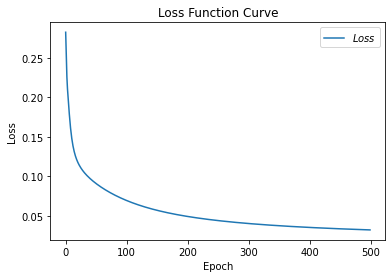

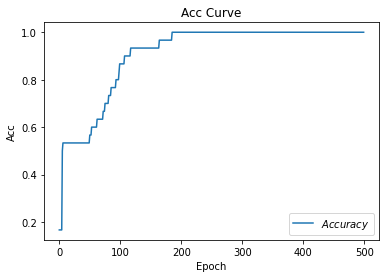

In [17]:
# -*- coding: UTF-8 -*-
# 利用鸢尾花数据集，实现前向传播、反向传播，可视化loss曲线

# 导入所需模块
import tensorflow as tf
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np

# 导入数据，分别为输入特征和标签
x_data = datasets.load_iris().data
y_data = datasets.load_iris().target

# 随机打乱数据（因为原始数据是顺序的，顺序不打乱会影响准确率）
# seed: 随机数种子，是一个整数，当设置之后，每次生成的随机数都一样（为方便教学，以保每位同学结果一致）
np.random.seed(116)  # 使用相同的seed，保证输入特征和标签一一对应
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)

# 将打乱后的数据集分割为训练集和测试集，训练集为前120行，测试集为后30行
x_train = x_data[:-30]
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]

# 转换x的数据类型，否则后面矩阵相乘时会因数据类型不一致报错
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)

# from_tensor_slices函数使输入特征和标签值一一对应。（把数据集分批次，每个批次batch组数据）
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

# 生成神经网络的参数，4个输入特征故，输入层为4个输入节点；因为3分类，故输出层为3个神经元
# 用tf.Variable()标记参数可训练
# 使用seed使每次生成的随机数相同（方便教学，使大家结果都一致，在现实使用时不写seed）
w1 = tf.Variable(tf.random.truncated_normal([4, 3], stddev=0.1, seed=1))
b1 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1, seed=1))

lr = 0.1  # 学习率为0.1
train_loss_results = []  # 将每轮的loss记录在此列表中，为后续画loss曲线提供数据
test_acc = []  # 将每轮的acc记录在此列表中，为后续画acc曲线提供数据
epoch = 500  # 循环500轮
loss_all = 0  # 每轮分4个step，loss_all记录四个step生成的4个loss的和

# 训练部分
for epoch in range(epoch):  #数据集级别的循环，每个epoch循环一次数据集
    for step, (x_train, y_train) in enumerate(train_db):  #batch级别的循环 ，每个step循环一个batch
        with tf.GradientTape() as tape:  # with结构记录梯度信息
            y = tf.matmul(x_train, w1) + b1  # 神经网络乘加运算
            y = tf.nn.softmax(y)  # 使输出y符合概率分布（此操作后与独热码同量级，可相减求loss）
            y_ = tf.one_hot(y_train, depth=3)  # 将标签值转换为独热码格式，方便计算loss和accuracy
            loss = tf.reduce_mean(tf.square(y_ - y))  # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss_all += loss.numpy()  # 将每个step计算出的loss累加，为后续求loss平均值提供数据，这样计算的loss更准确
        # 计算loss对各个参数的梯度
        grads = tape.gradient(loss, [w1, b1])

        # 实现梯度更新 w1 = w1 - lr * w1_grad    b = b - lr * b_grad
        w1.assign_sub(lr * grads[0])  # 参数w1自更新
        b1.assign_sub(lr * grads[1])  # 参数b自更新

    # 每个epoch，打印loss信息
    if epoch % 100 == 0:
        print("Epoch {}, loss: {}".format(epoch, loss_all/4))
    train_loss_results.append(loss_all / 4)  # 将4个step的loss求平均记录在此变量中
    loss_all = 0  # loss_all归零，为记录下一个epoch的loss做准备

    # 测试部分
    # total_correct为预测对的样本个数, total_number为测试的总样本数，将这两个变量都初始化为0
    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        # 使用更新后的参数进行预测
        y = tf.matmul(x_test, w1) + b1
        y = tf.nn.softmax(y)
        pred = tf.argmax(y, axis=1)  # 返回y中最大值的索引，即预测的分类
        # 将pred转换为y_test的数据类型
        pred = tf.cast(pred, dtype=y_test.dtype)
        # 若分类正确，则correct=1，否则为0，将bool型的结果转换为int型
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        # 将每个batch的correct数加起来
        correct = tf.reduce_sum(correct)
        # 将所有batch中的correct数加起来
        total_correct += int(correct)
        # total_number为测试的总样本数，也就是x_test的行数，shape[0]返回变量的行数
        total_number += x_test.shape[0]
    # 总的准确率等于total_correct/total_number
    acc = total_correct / total_number
    test_acc.append(acc)
    if epoch % 100 == 0:
        print("Test_acc:", acc)
        print("--------------------------")

# 绘制 loss 曲线
plt.title('Loss Function Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Loss')  # y轴变量名称
plt.plot(train_loss_results, label="$Loss$")  # 逐点画出trian_loss_results值并连线，连线图标是Loss
plt.legend()  # 画出曲线图标
plt.show()  # 画出图像

# 绘制 Accuracy 曲线
plt.title('Acc Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Acc')  # y轴变量名称
plt.plot(test_acc, label="$Accuracy$")  # 逐点画出test_acc值并连线，连线图标是Accuracy
plt.legend()
plt.show()